# PROGGETO Num_ DATA-ANALYTICS : .../08/2025
   ###### delmas fouegap

## **Problema**:
*Un'azienda vuole comprendere le interazioni tra i suoi **prodotti**, le **performance regionali** e i **margini** per ottimizzare le sue strategie di vendita*

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv(r"C:\Users\delma\OneDrive\Bureau\yomiDenzel\Projet_1 Data-Analytics\Sample - Superstore.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [88]:
print(list(df.columns))
df.isna().sum()
df.shape

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


(9994, 21)

### *- Ci sono valori mancanti o incoerenti*?

In [89]:

df.isna().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [90]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


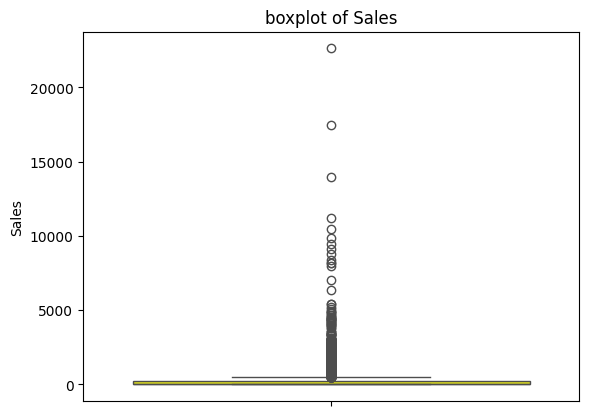

In [91]:
sns.boxplot(df["Sales"], color="yellow")
plt.title("boxplot of Sales")
plt.show()

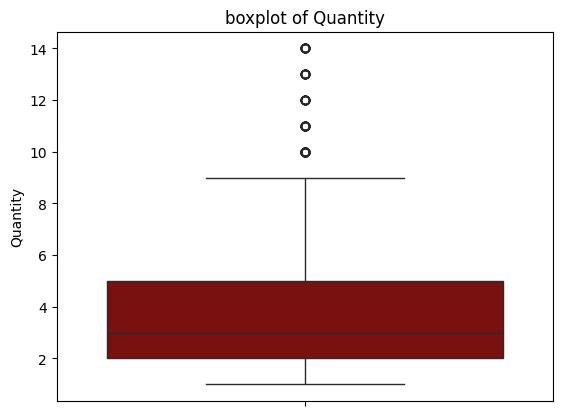

In [92]:
sns.boxplot(df["Quantity"], color="darkred")
plt.title("boxplot of Quantity")
plt.show()

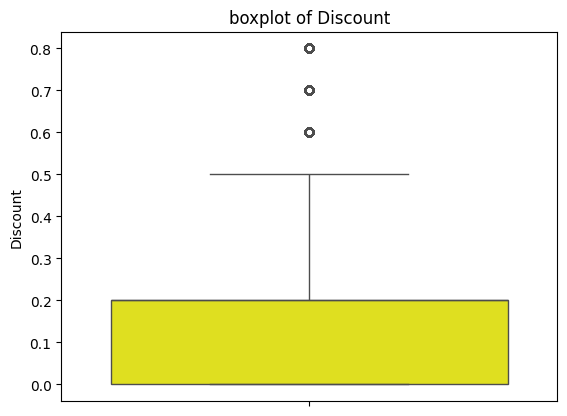

In [93]:
sns.boxplot(df["Discount"], color="yellow")
plt.title("boxplot of Discount")
plt.show()

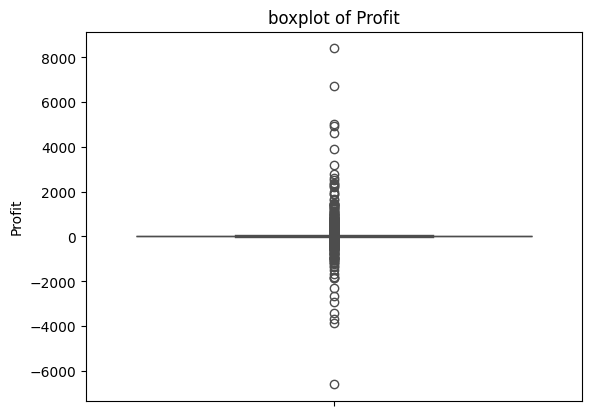

In [94]:
sns.boxplot(df["Profit"], color="red")
plt.title("boxplot of Profit")
plt.show()

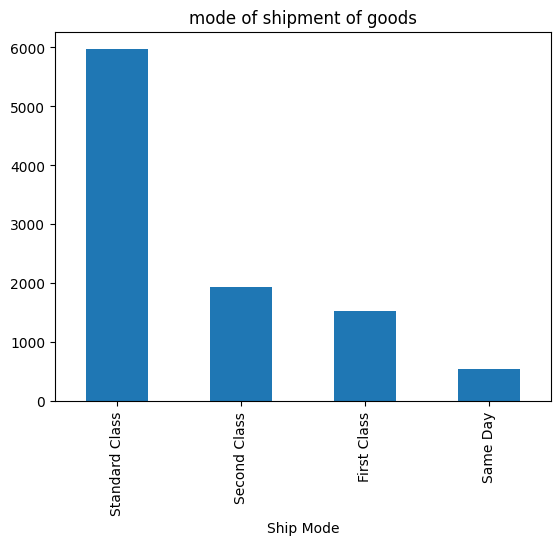

In [95]:
df["Ship Mode"].value_counts().plot(kind="bar", title="mode of shipment of goods")
plt.show()

## **Analisi delle prestazioni regionali**

#### *Identificare le regioni più/meno redditizie.*

Region
South      241.803645
East       238.336110
West       226.493233
Central    215.772661
Name: Sales, dtype: float64


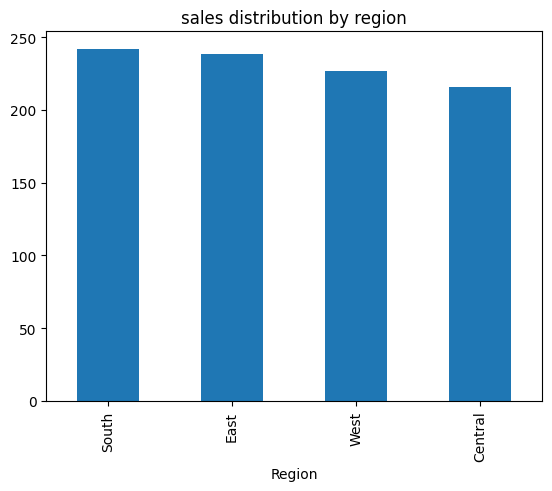

In [96]:
## Quali regioni generano il maggior numero di vendite?

df["Region"].value_counts()
most_vend = df.groupby("Region")["Sales"].mean().sort_values(ascending=False)
print(most_vend)
most_vend.plot(kind="bar", title="sales distribution by region")
plt.show()


### Osservazioni:
- La regione **Sud** ha registrato le vendite medie più elevate.
- Le regioni **Est** e **Ovest** hanno seguito da vicino, con performance leggermente inferiori.
- La regione **Centro** ha registrato le vendite medie più basse tra le quattro regioni analizzate.

Region
West       33.849032
East       32.135808
South      28.857673
Central    17.092709
Name: Profit, dtype: float64


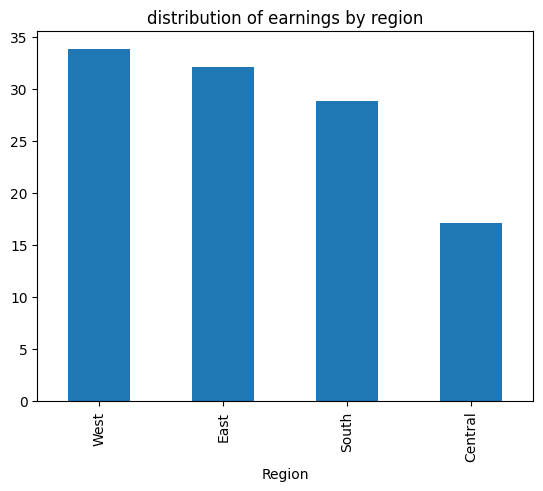

In [97]:
## Quali regioni generano i maggiori profitti?

most_gains = df.groupby("Region")["Profit"].mean().sort_values(ascending=False)
print(most_gains)
most_gains.plot(kind="bar", title="distribution of earnings by region")
plt.show()

### Osservazioni:
- La regione **West** ha il **miglior profitto medio**, superando di poco la **East**, che segue a ruota.
- Nonostante le buone vendite, la regione **South** si classifica al terzo posto in termini di redditività.
- La **Central** è la regione meno redditizia, con un profitto medio significativamente inferiore alle altre.
### 💡 Consiglio strategico:
**Analizza i margini per prodotto in ogni regione**, in particolare nelle regioni del Sud e del Centro. Adattare l'offerta (prodotti con margini più elevati) o ottimizzare i costi logistici potrebbe migliorare significativamente la redditività.

In [98]:
## Ci sono regioni con vendite elevate ma profitti bassi?

shm_1 = df.groupby("Region")["Sales"].mean().sort_values(ascending=False)
shm_2 = df.groupby("Region")["Profit"].mean().sort_values(ascending=False)
print(shm_1, shm_2)
pd.crosstab(shm_2, shm_1)

Region
South      241.803645
East       238.336110
West       226.493233
Central    215.772661
Name: Sales, dtype: float64 Region
West       33.849032
East       32.135808
South      28.857673
Central    17.092709
Name: Profit, dtype: float64


Sales,215.772661,226.493233,238.336110,241.803645
Profit,,,,
17.092709,1,0,0,0
28.857673,0,0,0,1
32.135808,0,0,1,0
33.849032,0,1,0,0


### Riepilogo - Vendite vs. Profitti per regione
#### Vendite medie:
- **South** > East > West > Central
#### Profitti medi:
- **West** > East > South > Central

### 💡 Conclusione:
Ci sono delle differenze sproporzionate tra vendite e profitti nelle diverse regioni

In [99]:
## Perché ci sono queste differenze sproporzionate tra vendite e profitti nelle diverse regioni?
    # Analizziamo le riduzioni nelle diverse regioni

df.groupby("Region")["Discount"].mean().sort_values(ascending=False)

Region
Central    0.240353
South      0.147253
East       0.145365
West       0.109335
Name: Discount, dtype: float64

### Sconti medi per regione:
- **Central**: 24,0% (più alto)
- **South**: 14,7%
- **East**: 14,5%
- **West**: 10,9% (più basso)

### Profitti medi:
- **West** > East > South > Central

### Interpretazione:
Le regioni con gli **sconti più alti** (Central e South) hanno anche i **profitti più bassi**, nonostante a volte si registrino buone vendite.

### 💡 Consiglio:
**Ridurre gli sconti eccessivi** in regioni come Centro e Sud. Una migliore gestione delle promozioni può aumentare i margini senza necessariamente influire sul volume delle vendite.

In [100]:
## Qual è l'impatto del tipo di cliente (Segment) per regione?

print(df["Segment"].value_counts())
pd.crosstab(df["Segment"], df["Region"])

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


Region,Central,East,South,West
Segment,,,,
Consumer,1212,1469,838,1672
Corporate,673,877,510,960
Home Office,438,502,272,571


In [101]:
tab =df.groupby(["Segment","Region"])["Sales"].mean().unstack()
tab

Region,Central,East,South,West
Segment,,,,
Consumer,207.946728,238.875539,233.390180,217.033955
Corporate,234.763466,228.516929,238.992025,235.265911
Home Office,208.248046,253.911805,272.996329,239.442692


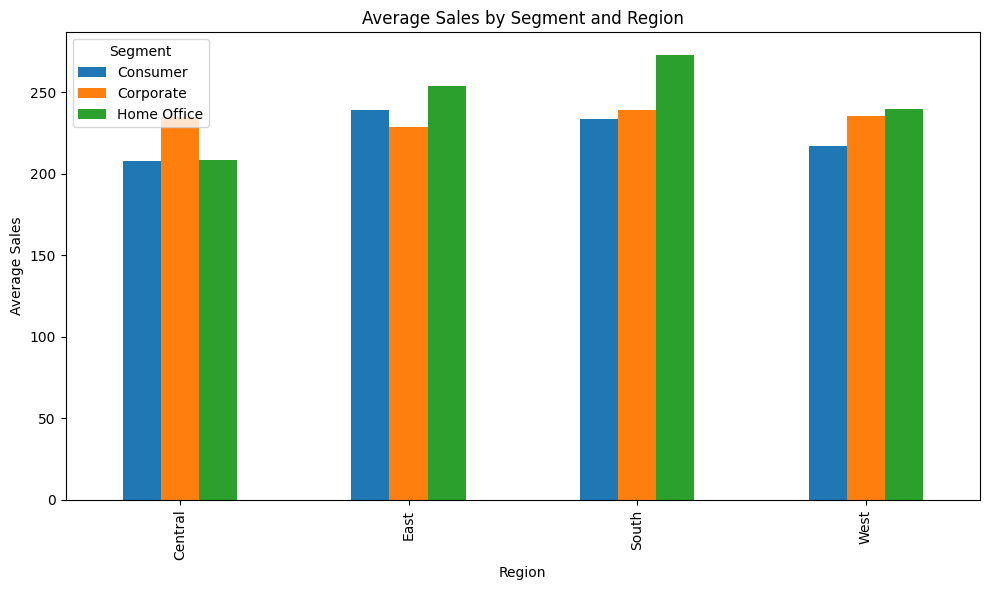

In [102]:
tab.T.plot(kind="bar", figsize=(10,6))
plt.title("Average Sales by Segment and Region")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


### Osservazioni:
In media:
- Il segmento **Home Office** ha registrato le migliori performance nel **South** (273,00) e nell'**East** (253,91).
- Il segmento **Corporate** rimane stabile e solido in tutte le regioni.
- Il segmento **Consumer** ha registrato performance più modeste, soprattutto nel **Central**.

### 💡 Consiglio:
Rafforza le campagne **Home Office** nel South e nell'East**, dove registrano risultati migliori. Allo stesso tempo, valuta azioni mirate per **rafforzare il segmento Consumer** nel Centro, che appare sottoutilizzato.


🛒 I 10 prodotti più venduti nella regione 'Central' sono:

- Easy-staple paper: 34 unità
- Staples: 31 unità
- Staple envelope: 27 unità
- Tennsco Double-Tier Lockers: 26 unità
- Wilson Jones Turn Tabs Binder Tool for Ring Binders: 24 unità
- High-Back Leather Manager's Chair: 24 unità
- Heavy-Duty E-Z-D Binders: 23 unità
- Acrylic Self-Standing Desk Frames: 21 unità
- GBC Prepunched Paper, 19-Hole, for Binding Systems, 24-lb: 21 unità
- Ibico Plastic Spiral Binding Combs: 20 unità


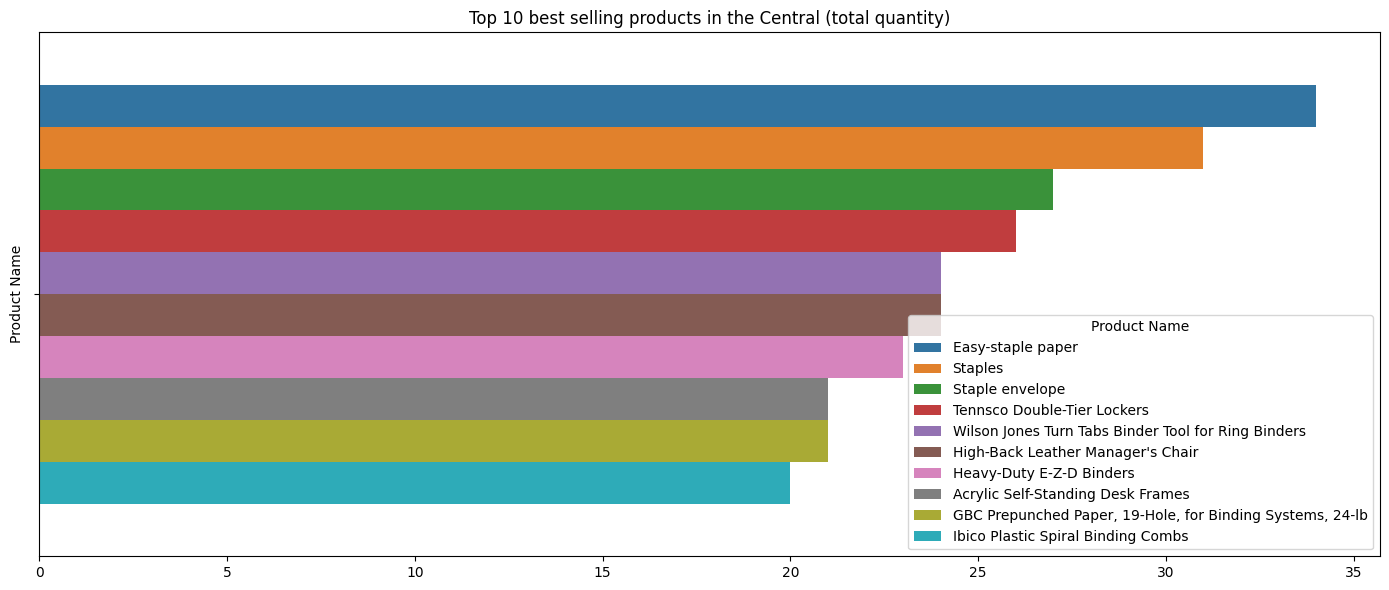

In [103]:
## Quali prodotti funzionano meglio in quali regioni?

Central_df = df[df["Region"] == "South"]

top_Central_df = Central_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
top_Central_df

print("\n🛒 I 10 prodotti più venduti nella regione 'Central' sono:\n")
for prodotto, qty in top_Central_df.items():
    print(f"- {prodotto}: {qty} unità")

plt.figure(figsize=(14, 6))
sns.barplot(x=top_Central_df.values, hue=top_Central_df.index)
plt.title("Top 10 best selling products in the Central (total quantity)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


🛒 I 10 prodotti più venduti nella regione 'West' sono:

- Easy-staple paper: 34 unità
- Staples: 31 unità
- Staple envelope: 27 unità
- Tennsco Double-Tier Lockers: 26 unità
- Wilson Jones Turn Tabs Binder Tool for Ring Binders: 24 unità
- High-Back Leather Manager's Chair: 24 unità
- Heavy-Duty E-Z-D Binders: 23 unità
- Acrylic Self-Standing Desk Frames: 21 unità
- GBC Prepunched Paper, 19-Hole, for Binding Systems, 24-lb: 21 unità
- Ibico Plastic Spiral Binding Combs: 20 unità


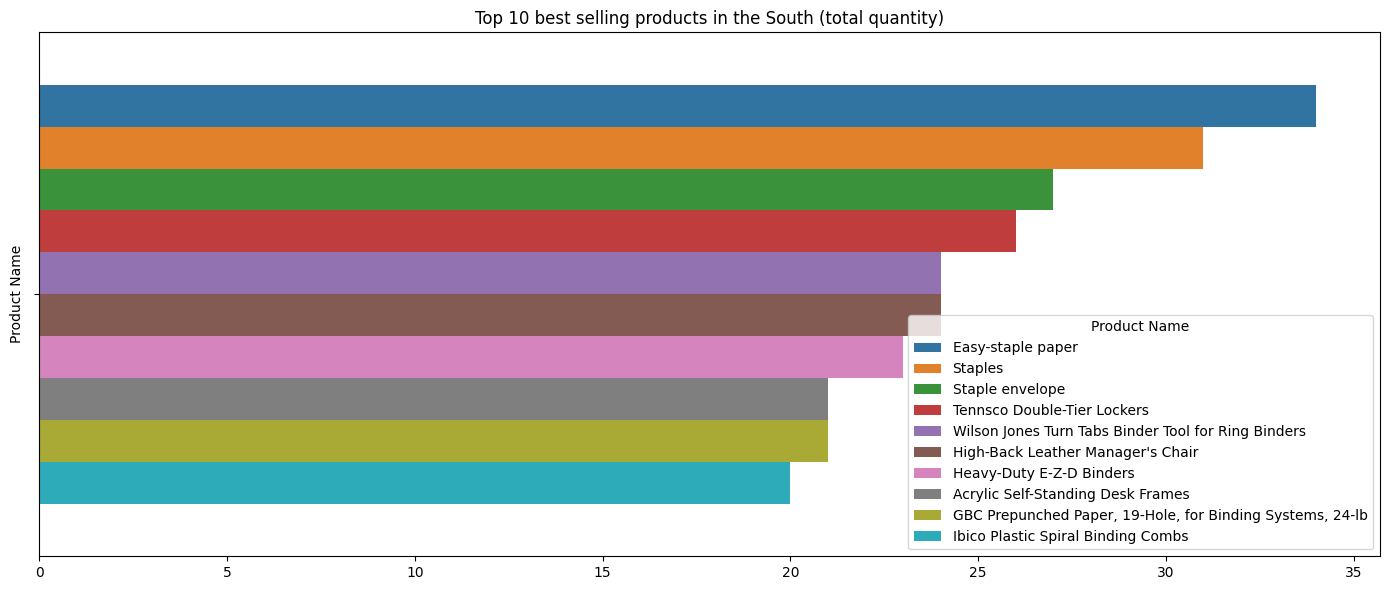

In [104]:

South_df = df[df["Region"] == "South"]

top_South_df = South_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
top_South_df

print("\n🛒 I 10 prodotti più venduti nella regione 'West' sono:\n")
for prodotto, qty in top_South_df.items():
    print(f"- {prodotto}: {qty} unità")

plt.figure(figsize=(14, 6))
sns.barplot(x=top_South_df.values, hue=top_South_df.index)
plt.title("Top 10 best selling products in the South (total quantity)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


🛒 I 10 prodotti più venduti nella regione 'West' sono:

- Staples: 43 unità
- Easy-staple paper: 35 unità
- Wilson Jones Clip & Carry Folder Binder Tool for Ring Binders, Clear: 32 unità
- Staple envelope: 32 unità
- Cardinal EasyOpen D-Ring Binders: 31 unità
- Eldon Wave Desk Accessories: 30 unità
- Logitech P710e Mobile Speakerphone: 29 unità
- Vinyl Sectional Post Binders: 29 unità
- Eldon Shelf Savers Cubes and Bins: 29 unità
- Dana Halogen Swing-Arm Architect Lamp: 28 unità


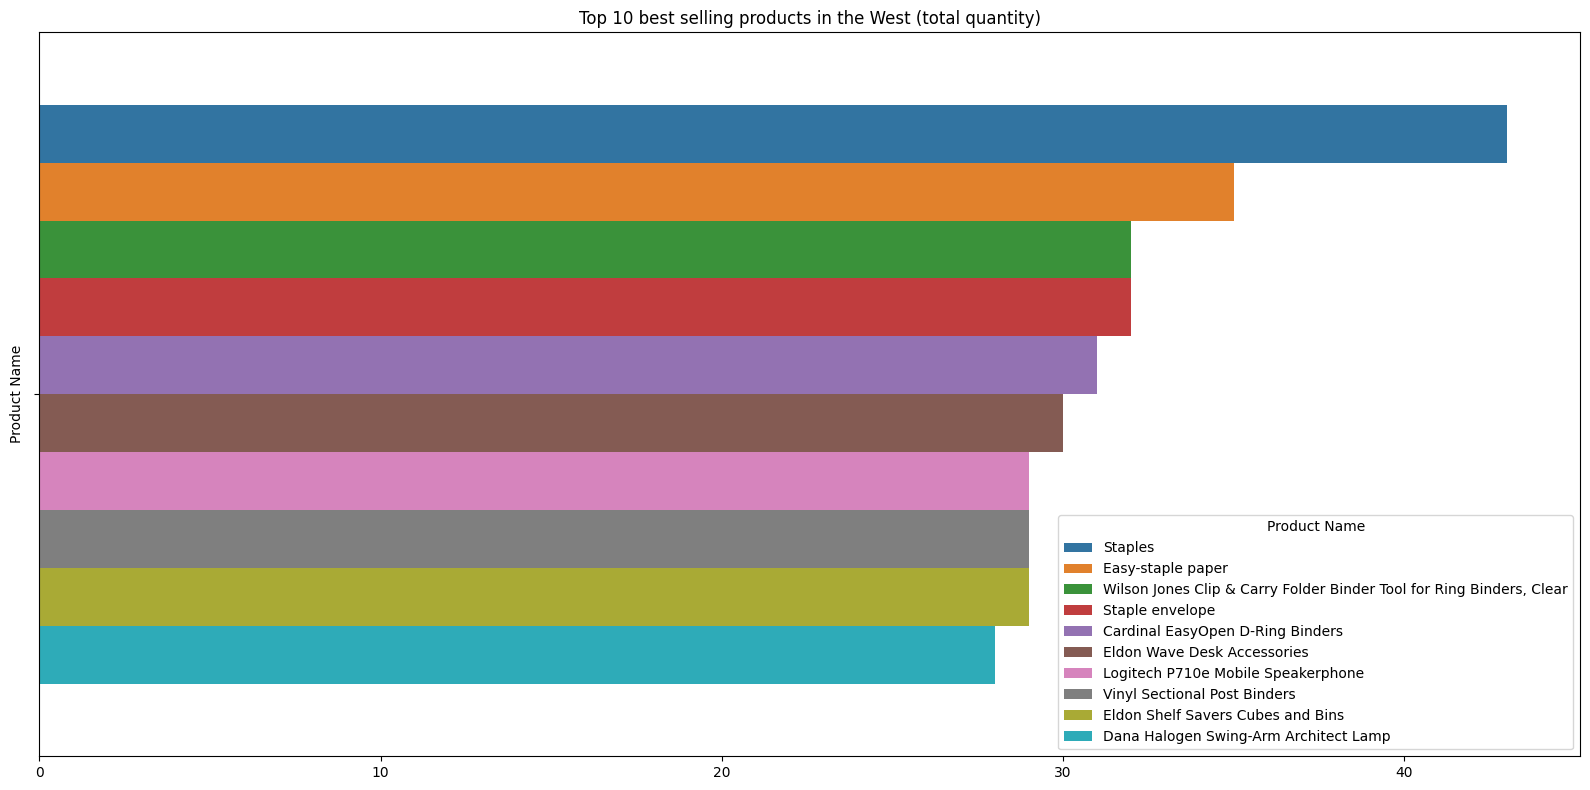

In [105]:

West_df = df[df["Region"] == "West"]

top_West_df = West_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
top_West_df

print("\n🛒 I 10 prodotti più venduti nella regione 'West' sono:\n")
for prodotto, qty in top_West_df.items():
    print(f"- {prodotto}: {qty} unità")

plt.figure(figsize=(16, 8))
sns.barplot(x=top_West_df.values, hue=top_West_df.index)
plt.title("Top 10 best selling products in the West (total quantity)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


🛒 I 10 prodotti più venduti nella regione 'East' sono:

- Staples: 71 unità
- Staple envelope: 68 unità
- Easy-staple paper: 41 unità
- Fellowes PB200 Plastic Comb Binding Machine: 32 unità
- OIC Colored Binder Clips, Assorted Sizes: 31 unità
- Dual Level, Single-Width Filing Carts: 29 unità
- GBC Premium Transparent Covers with Diagonal Lined Pattern: 28 unità
- PureGear Roll-On Screen Protector: 27 unità
- Storex Dura Pro Binders: 26 unità
- Situations Contoured Folding Chairs, 4/Set: 26 unità


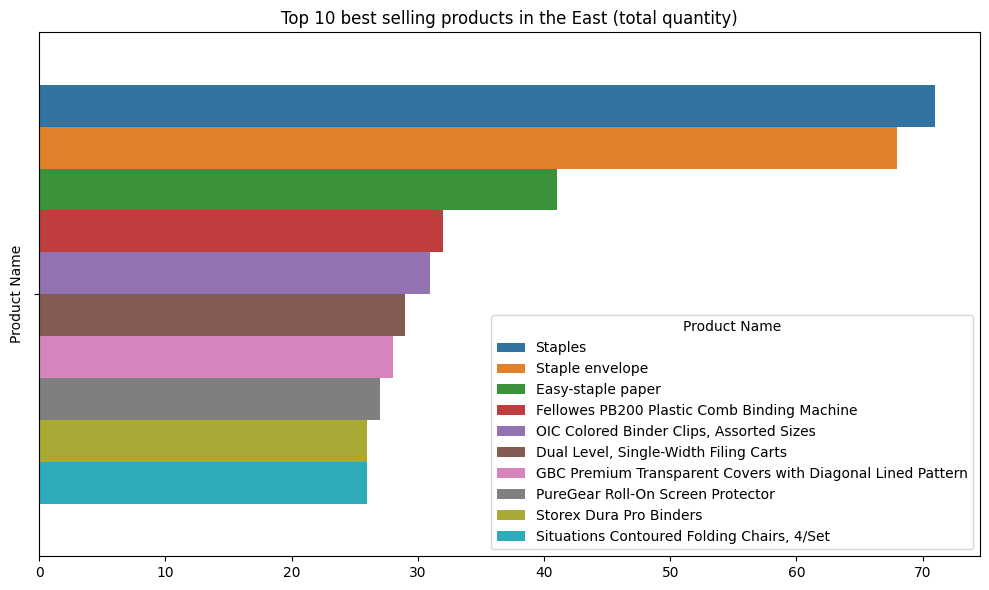

In [106]:

east_df = df[df["Region"] == "East"]

top_East_df = east_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
top_East_df

print("\n🛒 I 10 prodotti più venduti nella regione 'East' sono:\n")
for prodotto, qty in top_East_df.items():
    print(f"- {prodotto}: {qty} unità")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_East_df.values, hue=top_East_df.index)
plt.title("Top 10 best selling products in the East (total quantity)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64



💰vendite effettuate per categoria:
Category
Technology         452.709276
Furniture          349.834887
Office Supplies    119.324101
Name: Sales, dtype: float64


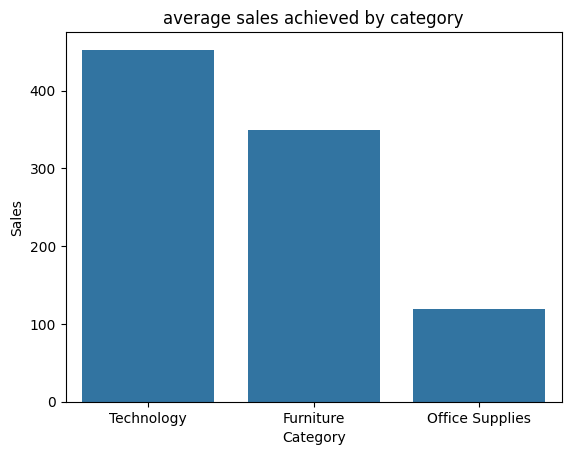


📈benefici realizzati per categorie:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


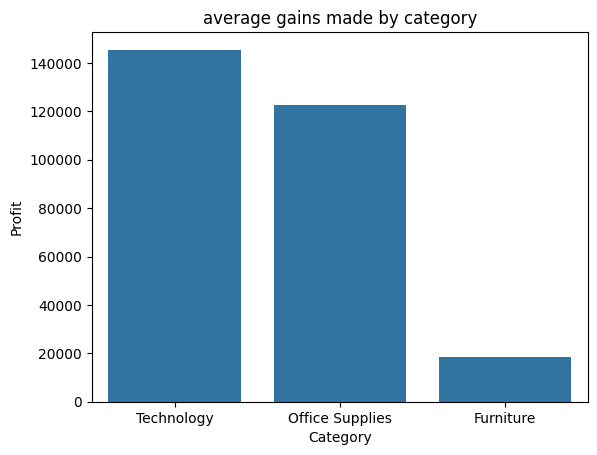

In [107]:
## Quali categorie generano il maggior numero di vendite?

print(df["Category"].value_counts())
print("\n")
print("\n💰vendite effettuate per categoria:")
shm_ = df.groupby("Category")["Sales"].mean().sort_values(ascending=False)
print(shm_)
sns.barplot(shm_)
plt.title("average sales achieved by category")
plt.show()

print("\n📈benefici realizzati per categorie:")
shm__ = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
print(shm__)
sns.barplot(shm__)
plt.title("average gains made by category")
plt.show()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64



💰vendite effettuate per Sub-Category:

Sub-Category
Copiers        2198.941618
Machines       1645.553313
Tables          648.794771
Chairs          532.332420
Bookcases       503.859633
Phones          371.211534
Storage         264.590553
Supplies        245.650200
Appliances      230.755710
Accessories     215.974604
Binders         133.560560
Furnishings      95.825668
Envelopes        64.867724
Paper            57.284092
Labels           34.303055
Art              34.068834
Fasteners        13.936774
Name: Sales, dtype: float64


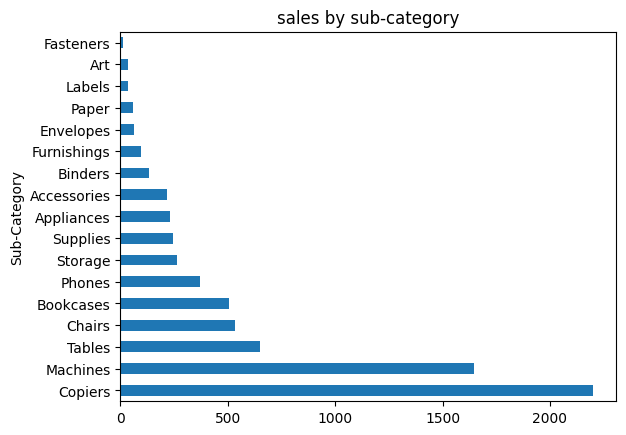


📈benefici realizzati per Sub-Category:

Sub-Category
Copiers        817.909190
Accessories     54.111788
Phones          50.073938
Chairs          43.095894
Appliances      38.922758
Machines        29.432669
Envelopes       27.418019
Storage         25.152277
Paper           24.856620
Binders         19.843574
Labels          15.236962
Furnishings     13.645918
Art              8.200737
Fasteners        4.375660
Supplies        -6.258418
Bookcases      -15.230509
Tables         -55.565771
Name: Profit, dtype: float64


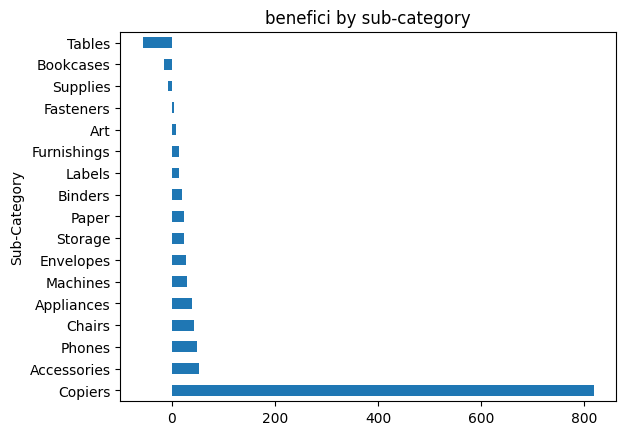

In [108]:
## Quali Sub-Category generano il maggior numero di vendite?

print(df["Sub-Category"].value_counts())
print("\n")
print("\n💰vendite effettuate per Sub-Category:\n")
sub_c = df.groupby("Sub-Category")["Sales"].mean().sort_values(ascending=False)
print(sub_c)
sub_c.plot(kind="barh", title="sales by sub-category")
plt.show()

print("\n📈benefici realizzati per Sub-Category:\n")
sub_c2 = df.groupby("Sub-Category")["Profit"].mean().sort_values(ascending=False)
print(sub_c2)
sub_c2.plot(kind="barh", title="benefici by sub-category")
plt.show()

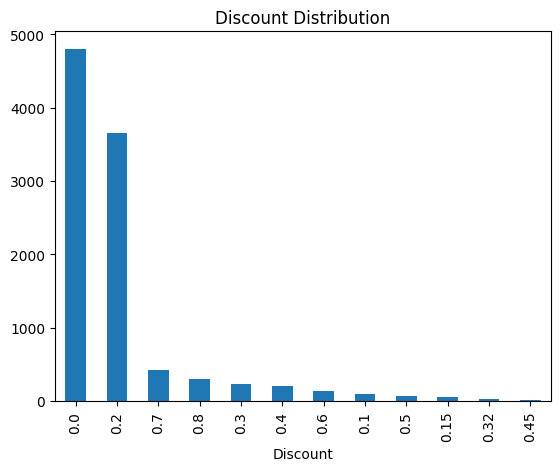

In [109]:
df["Discount"].value_counts().plot(kind="bar", title="Discount Distribution")
plt.show()

### Distribuzione degli sconti

Il grafico mostra che la maggior parte delle transazioni viene effettuata senza sconto (0,0) o con uno sconto moderato (0,2). Sconti più elevati sono molto meno frequenti, il che suggerisce che sconti elevati vengono concessi raramente, quindi hanno un impatto minimo sugli utili dell'azienda.

### 

I Sub-Category in perdita sono:

Sub-Category
Supplies     -6.258418
Bookcases   -15.230509
Tables      -55.565771
Name: Profit, dtype: float64


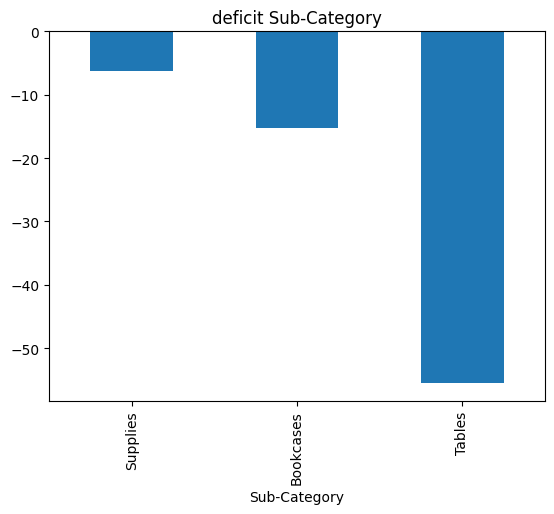

In [110]:
print("I Sub-Category in perdita sono:\n")
perd = sub_c2[sub_c2 < 0]
print(perd)
perd.plot(kind="bar", title="deficit Sub-Category")
plt.show()


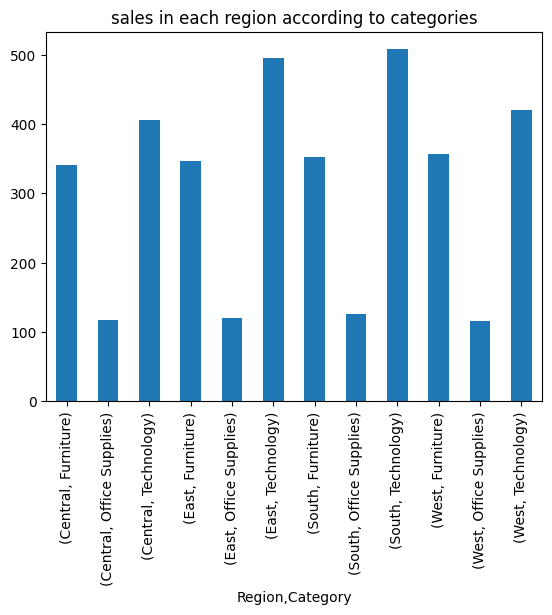

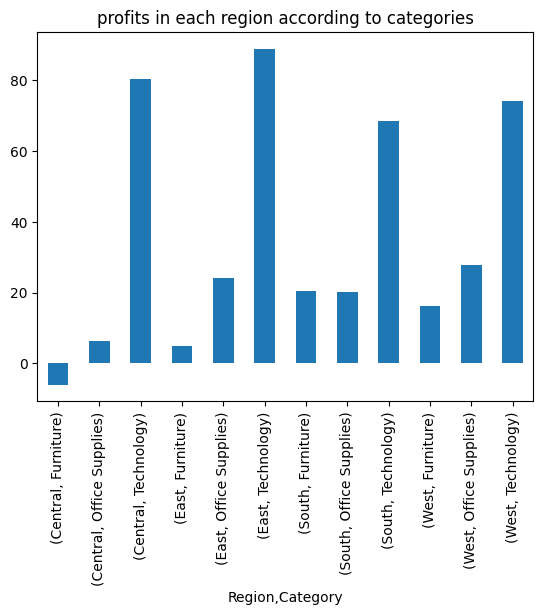

In [111]:
df.groupby(["Region", "Category"])["Sales"].mean().plot(kind="bar", title="sales in each region according to categories")
plt.show()
df.groupby(["Region", "Category"])["Profit"].mean().plot(kind="bar", title="profits in each region according to categories")
plt.show()

- ⚠️ **"Furniture" nella regione Central è in perdita**:
- Sebbene le vendite siano moderate (~340), i profitti sono **negativi**.
- Ciò indica **costi elevati o sconti eccessivi**.

  ## 🔍*analizziamo questo*:

In [112]:
print(df.groupby(["Category","Region"])["Discount"].mean().unstack())
print("\n")
df.groupby(["Category","Region"])["Sales"].mean().unstack()
df.groupby(["Category","Region"])["Sales"].mean().unstack()

Region            Central      East     South      West
Category                                               
Furniture        0.297380  0.154077  0.121536  0.131400
Office Supplies  0.252743  0.142932  0.167437  0.093358
Technology       0.133095  0.143364  0.107850  0.133890




Region,Central,East,South,West
Category,,,,
Furniture,340.534644,346.574383,353.309289,357.302325
Office Supplies,117.458801,120.044425,126.282727,116.422377
Technology,405.753124,495.278469,507.753952,420.687533


Segment                  Consumer  Corporate  Home Office
Region  Category                                         
Central Furniture             255        137           89
        Office Supplies       739        417          266
        Technology            218        119           83
East    Furniture             303        198          100
        Office Supplies       888        520          304
        Technology            278        159           98
South   Furniture             180        101           51
        Office Supplies       505        324          166
        Technology            153         85           55
West    Furniture             375        210          122
        Office Supplies       995        559          343
        Technology            302        191          106

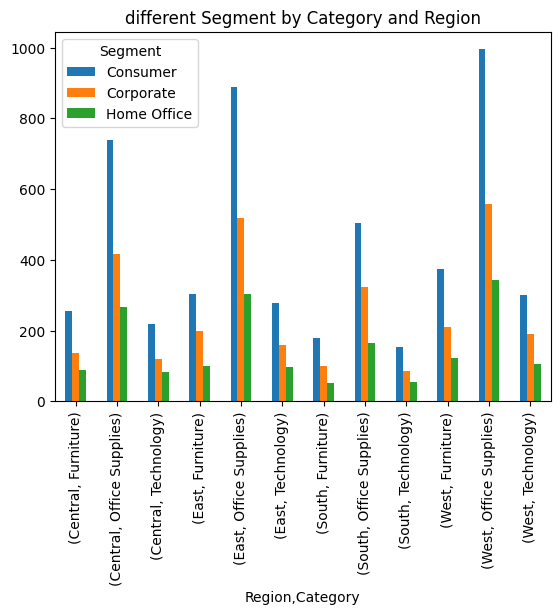

In [113]:
c = pd.crosstab([df["Region"],df["Category"]], df["Segment"])
c.plot(kind="bar", title="different Segment by Category and Region")
c

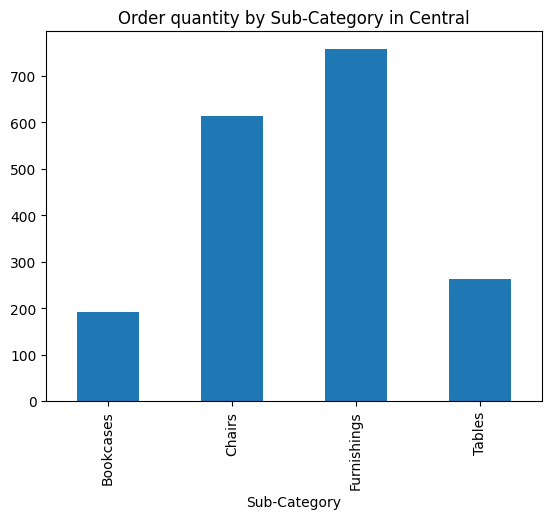

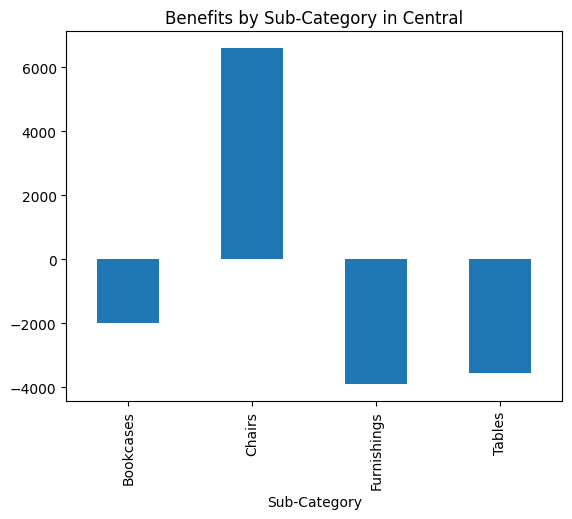

In [114]:
df[(df["Region"] == "Central") & (df["Category"] == "Furniture")].groupby("Sub-Category")["Quantity"].sum().plot(kind="bar", title="Order quantity by Sub-Category in Central")
plt.show()
df[(df["Region"] == "Central") & (df["Category"] == "Furniture")].groupby("Sub-Category")["Profit"].sum().plot(kind="bar", title="Benefits by Sub-Category in Central")
plt.show()                                                                                           

## 📊 Analisi dei mobili (**Chairs**) venduti nella regione Centrale (Central)

### ✅ Quantità ordinata:
- I prodotti più ordinati sono **Furnishings** e **Chairs**.
- Le **Bookcases** sono i meno ordinati.

### 💰 Profitti realizzati:
- Solo le **Chairs** generano profitti.
- Le altre sottocategorie (**Furnishings**, **Tables**, **Bookcases**) stanno perdendo denaro, soprattutto gli **Furnishings**, nonostante l'elevato volume di vendite.

---

### 🔚 Conclusione:

🔍 È quindi a causa di **Furnishings**, **Tables**, **Bookcases** che abbiamo un **deficit nella zona centrale** per la **Furnture** . 

Queste sotto-categorie:
Vendere molto non significa sempre guadagnare. Bisogna concentrarsi sui prodotti **che fanno davvero guadagnare**, come le **Chairs**, e **esaminare quelli che causano perdite**.


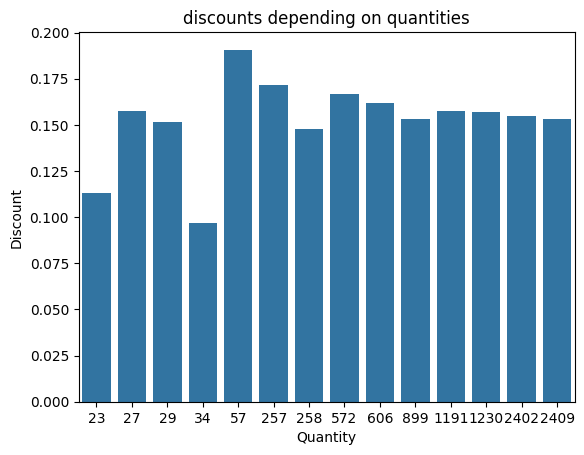

In [115]:
## Esiste una relazione tra quantità venduta e sconto?

x = df.groupby("Quantity")["Discount"].mean()
y = df["Quantity"].value_counts().sort_index(ascending=True)

sns.barplot(x=y, y=x)
plt.xlabel("Quantity")
plt.title("discounts depending on quantities")
plt.show()

## 📊 Analisi: Esiste una relazione tra quantità venduta e sconto?

L'analisi dello sconto medio applicato in funzione della quantità venduta mostra che non esiste una chiara relazione lineare tra queste due variabili.

### 🔍 Osservazioni chiave:

- Alcune piccole quantità (ad esempio, 57 o 257) hanno sconti medi elevati (~0,19), mentre altre (ad esempio, 34) hanno sconti inferiori (~0,10).
- Le grandi quantità (oltre 600 unità) beneficiano generalmente di sconti medi stabili, intorno allo 0,15.
- Non vi è una tendenza costante al rialzo o al ribasso nello sconto rispetto alla quantità.

### 🧠 Conclusione:

> Lo sconto non dipende esclusivamente dalla quantità venduta. > Pertanto, **non si osserva alcuna correlazione evidente** tra la quantità venduta e lo sconto medio.

## 🎯

In [116]:
list(df.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']